# Use Python <3.10

This package heavily utilizes the pyMuellerMat package that makes Mueller matrices from "system dictionaries" detailing the instrument configuration. If you want to familiarize yourself with the package beforehand, visit https://github.com/maxwellmb/pyMuellerMat/

In [1]:
import sys
import numpy as np
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
from instruments import *
from physical_models import *

# Step 1: Write FITS Info to CSV

In [4]:
# Get paths to both processed and raw data 
# Make sure these directories have cubes with corresonding numbers
cube_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Cubes_3/cubes'
raw_dir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Raw_3/internal-cal'

# Write all bins to csvs
for bin in range(0,22):
   csv_filepath = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
   write_fits_info_to_csv(cube_dir, raw_dir, csv_filepath,bin)



CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin0.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin1.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin2.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin3.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin4.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin5.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin6.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin7.csv
CSV file written to /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cu

# Step 2 (Optional): Split Up Your Data

In [5]:
# This is specific to what I'm fitting
# I'm going to split the csvs in half because one half has the pickoff in and the other half has it out

# sort csvs into with and without pickoff
def split_csv(file_path):
    file_path = Path(file_path)
    if not file_path.exists() or file_path.suffix != ".csv":
        raise ValueError("Please provide a valid .csv file.")

    # Read original CSV
    df = pd.read_csv(file_path)

    # Split into two DataFrames
    df_no_pickoff = df.iloc[72:].reset_index(drop=True)
    df_with_pickoff = df.iloc[:72].reset_index(drop=True)

    # Create new file names
    stem = file_path.stem  # without .csv
    suffix = file_path.suffix
    parent = file_path.parent
    pickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff')
    nopickoff_folder = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff')
    no_pickoff_path = nopickoff_folder / f"{stem}_no_pickoff{suffix}"
    with_pickoff_path = pickoff_folder / f"{stem}_with_pickoff{suffix}"

    # Save the new CSVs
    df_no_pickoff.to_csv(no_pickoff_path, index=False)
    df_with_pickoff.to_csv(with_pickoff_path, index=False)

    print(f"Saved: {no_pickoff_path}")
    print(f"Saved: {with_pickoff_path}")

# split all csvs
for bin in range(0,22):
     csv_path = f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs/charis_cube_info_bin{bin}.csv'
     split_csv(csv_path)

Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin0_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin0_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin1_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin1_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin2_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin2_with_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin3_no_pickoff.csv
Saved: /Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_pickoff/charis_cube_info_bin3_with_pickoff.csv
Saved: /Users/thomasmcintosh/Des

# Step 3 (Optional): Plot Your Data With the Original Model 

In [2]:
# Define a csv filepath that we just created from whatever wavelength bin you want to visualize
# I have bin zero here, but I would recommend using a bin more in the middle to get a good idea,
# bin zero can be finicky
filepath = Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin0_no_pickoff.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath)
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  144
[ 2.40226822e-01  8.57249726e+06  1.22894629e-01  8.67034234e+06
 -1.62887644e-01  8.94185980e+06 -4.41211984e-01  9.46392383e+06
 -5.72066207e-01  9.74238064e+06]
Interleaved Stds
Length:  144
[3.31542235e-04 2.92788273e+03 3.37036755e-04 2.94454450e+03
 3.29949007e-04 2.99029427e+03 2.91710362e-04 3.07634911e+03
 2.62779306e-04 3.12127869e+03]
Configuration List
Length:  72
[{'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 11.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 33.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 56.25}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 78.75}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 90.0}, 'image_rotator': {'theta': 45.0}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'th

In [7]:

# Define wavelength bins for CHARIS

wavelength_bins = np.array([1159.5614, 1199.6971, 1241.2219, 1284.184 , 1328.6331, 1374.6208,
1422.2002, 1471.4264, 1522.3565, 1575.0495, 1629.5663, 1685.9701,
1744.3261, 1804.7021, 1867.1678, 1931.7956, 1998.6603, 2067.8395,
2139.4131, 2213.4641, 2290.0781, 2369.3441])

# Loading in past fits from Joost t Hart 2021

offset_imr = -0.0118 # derotator offset
offset_hwp = -0.002 # HWP offset
offset_cal = -0.035 # calibration polarizer offset
imr_theta = 0
hwp_theta = 0

# Define instrument configuration as system dictionary
# Wollaston beam, imr theta/phi, and hwp theta/phi will all be updated within functions, so don't worry about their values here

system_dict = {
        "components" : {
            "wollaston" : {
            "type" : "wollaston_prism_function",
            "properties" : {"beam": 'o'}, 
            "tag": "internal",
            },
            "image_rotator" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": imr_theta, "delta_theta": offset_imr},
                "tag": "internal",
            },
            "hwp" : {
                "type" : "general_retarder_function",
                "properties" : {"phi": 0, "theta": hwp_theta, "delta_theta": offset_hwp},
                "tag": "internal",
            },
            "lp" : {  # calibration polarizer for internal calibration source
                "type": "general_linear_polarizer_function_with_theta",
                "properties": {"delta_theta": offset_cal },
                "tag": "internal",
            }}
    }

# Converting system dictionary into system Mueller Matrix object

system_mm = generate_system_mueller_matrix(system_dict)
print(system_mm.evaluate())



[[ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.49999981  0.49999944 -0.00061086  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


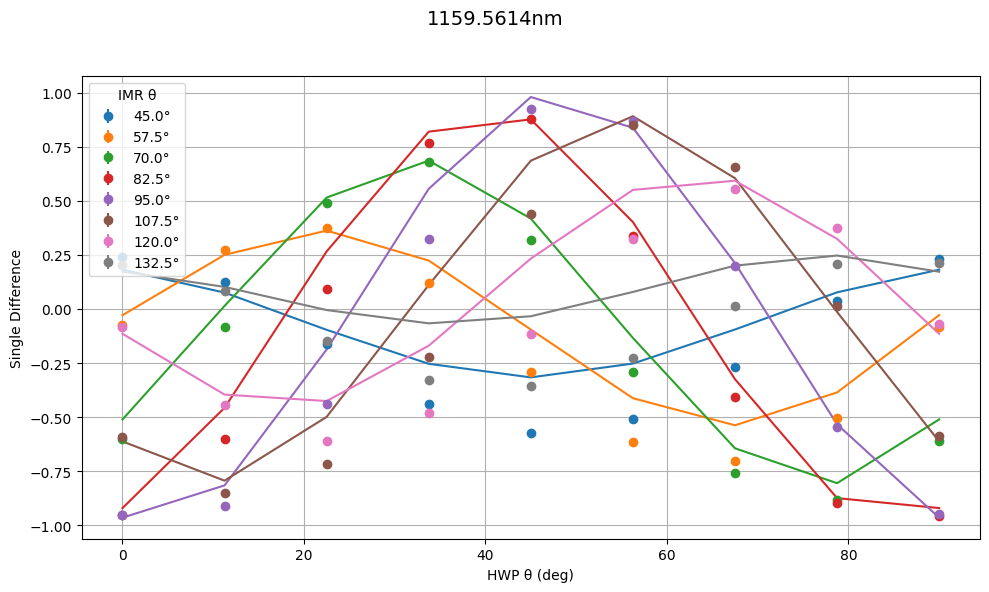

Residuals range: -0.34850937187899333 0.05915823439866466


In [8]:

# Get our model retardances from Joost t Hart physical models

p = [HWP_retardance(wavelength_bins)[0], IMR_retardance(wavelength_bins)[0]]


# Gefine what is in the p list

system_parameters = [['hwp', 'phi'], ['image_rotator', 'phi']]

# Generate our modeled left and right beam intensities

LR_intensities = model(p, system_parameters, system_mm, configuration_list)

# Process these into interleaved single norm differences and sums

diffs_sums = process_model(LR_intensities, 'CHARIS')

# Plot the modeled and observed values

plot_data_and_model(interleaved_values, interleaved_stds, diffs_sums,configuration_list, wavelength= wavelength_bins[0], mode='CHARIS')

# Print residuals (will be useful later to see if your fit improved at a quick glance)
residuals = interleaved_values[::2] - diffs_sums[::2]
print("Residuals range:", residuals.min(), residuals.max())


# Step 4: Fit New Model

I made a function that does everything quickly but is also tailored to the parameters I am fitting. My function updates the model, puts the pyMuellerMat compatible system dictionary in a JSON file, and optionally saves a plot of the model vs data to a specified path.
If you want to use it for different parameters than the ones detailed in the docstring, 
you'll have to update the function a bit (which shouldn't take too long). 

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 6375645.390952509
       x: [ 4.364e+00 -1.067e-02  3.029e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-5.365e-04  3.673e-06 ... -4.595e-07  1.117e-05]]
    nfev: 95
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 6375643.265118497
       x: [ 4.364e+00 -1.067e-02  3.029e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]]
    nfev: 39


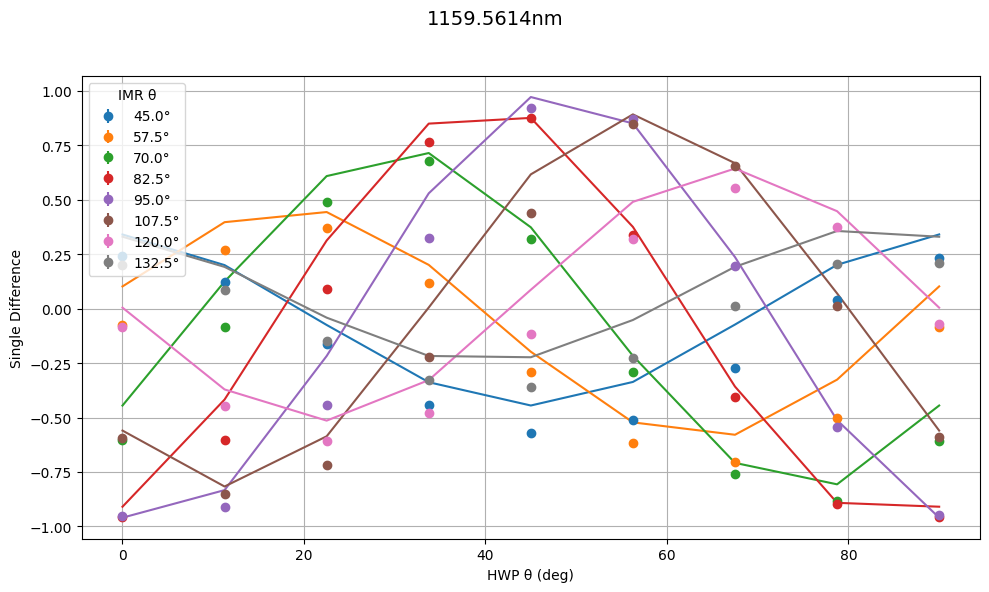

Updated Mueller Matrix:
[[ 0.33262214  0.33262194 -0.0003664   0.        ]
 [-0.33262214 -0.33262194  0.0003664   0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.22717314237372016 0.017914162340112783


In [3]:
# Test fitting with the wavelength bin we plotted earlier

fit_CHARIS_Mueller_matrix_by_bin(filepath, 0, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff/bin0.json'),
    plot_path=Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_no_pickoff/bin0.png'))


Looks like our model improved! Note that the Joost't Hart paper used a more elaborate physical model, which I will incorporate later. These fits are a good starting point for more detailed models.

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 6375645.390952509
       x: [ 4.364e+00 -1.067e-02  3.029e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-5.365e-04  3.673e-06 ... -4.595e-07  1.117e-05]]
    nfev: 95
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 6375643.265118497
       x: [ 4.364e+00 -1.067e-02  3.029e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]]
    nfev: 39


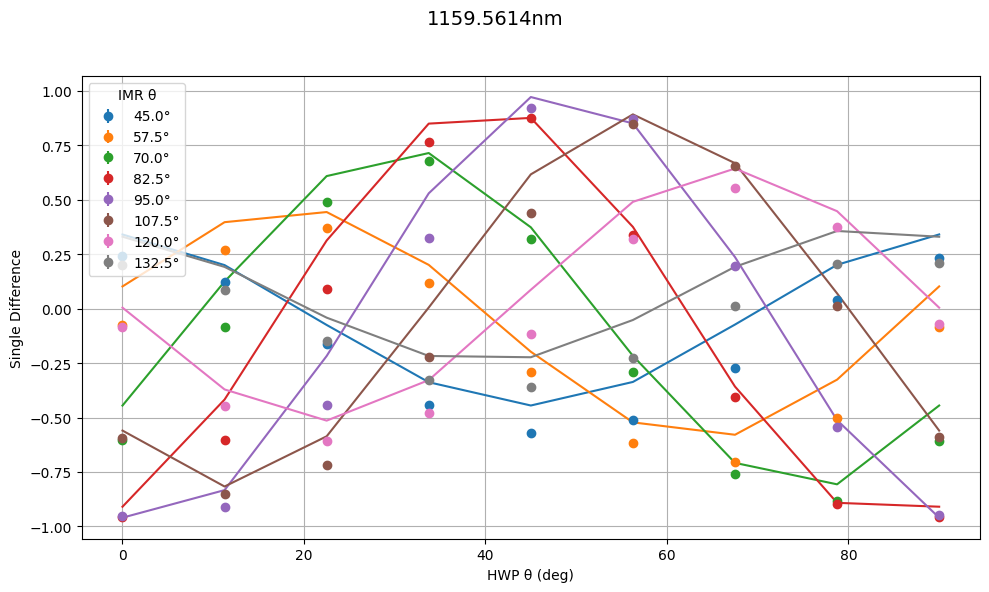

Updated Mueller Matrix:
[[ 0.33262214  0.33262194 -0.0003664   0.        ]
 [-0.33262214 -0.33262194  0.0003664   0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.22717314237372016 0.017914162340112783
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2452299.0655304138
       x: [ 4.086e+00 -1.067e-02  3.034e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 1.873e-03 -9.891e-06 ...  1.238e-06 -3.008e-05]]
    nfev: 91
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2452293.377250461
       x: [ 4.086e+00 -1.067e-02  3.034e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 

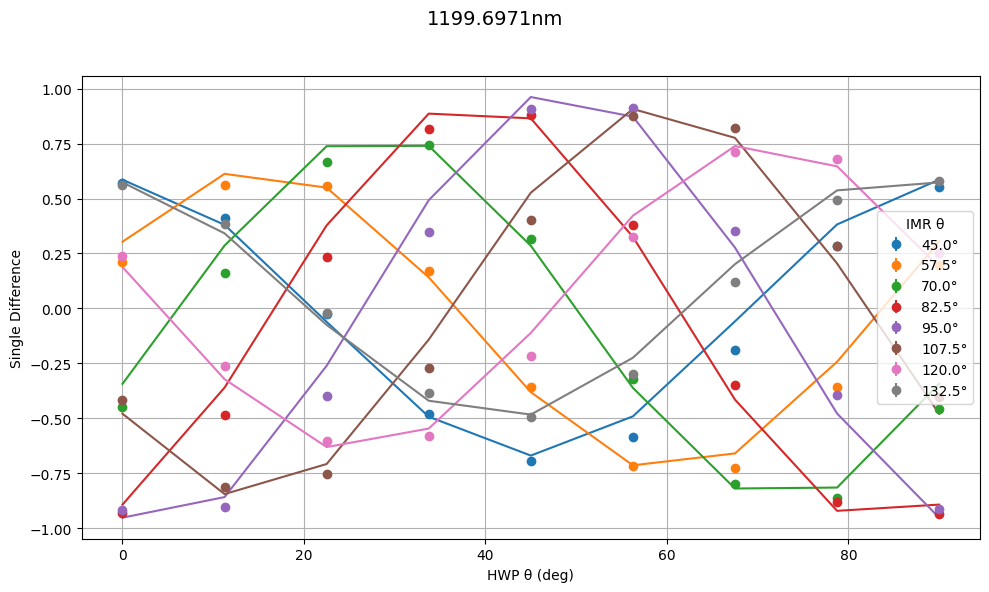

Updated Mueller Matrix:
[[ 0.39340712  0.39340688 -0.00043336  0.        ]
 [-0.39340712 -0.39340688  0.00043336  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14527426817646588 0.08298971297227026
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 4358963.014173674
       x: [ 3.871e+00 -1.067e-02  3.044e+00 -2.142e-03 -3.156e-02]
     nit: 3
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 5.442e-03 -4.063e-05 ...  5.083e-06 -1.236e-04]]
    nfev: 132
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 4358938.339286571
       x: [ 3.871e+00 -1.067e-02  3.044e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0

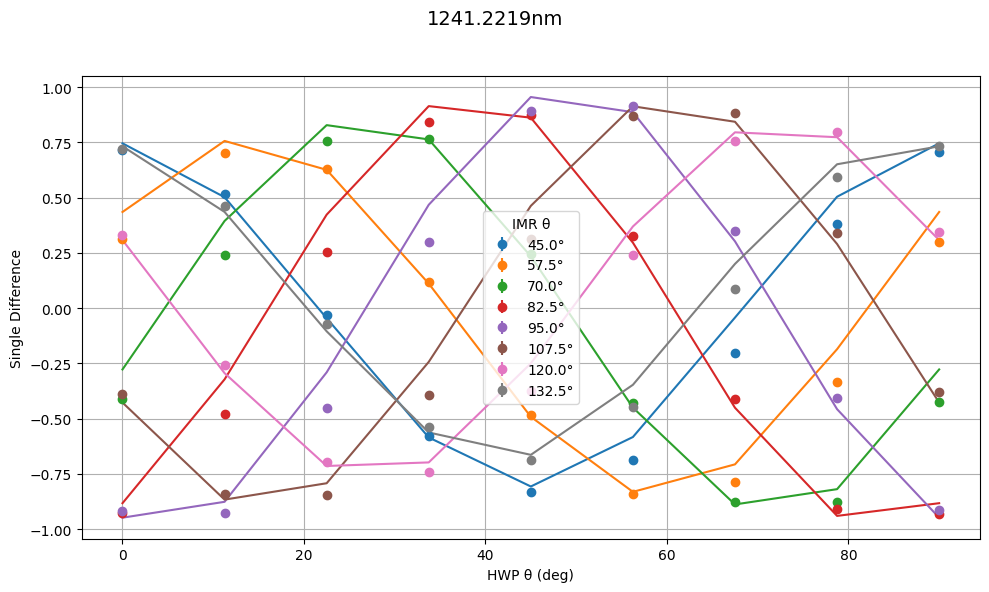

Updated Mueller Matrix:
[[ 0.4329376   0.43293733 -0.0004769   0.        ]
 [-0.4329376  -0.43293733  0.0004769   0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16905711957844016 0.04938516771752227
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 6084084.718942538
       x: [ 3.635e+00 -1.067e-02  3.067e+00 -2.142e-03 -3.156e-02]
     nit: 3
   direc: [[ 1.037e-02 -1.441e-04 ...  1.803e-05 -4.382e-04]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-2.525e-03 -2.077e-06 ...  2.599e-07 -6.318e-06]]
    nfev: 179
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 6072446.154707099
       x: [ 3.639e+00 -1.067e-02  3.079e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0

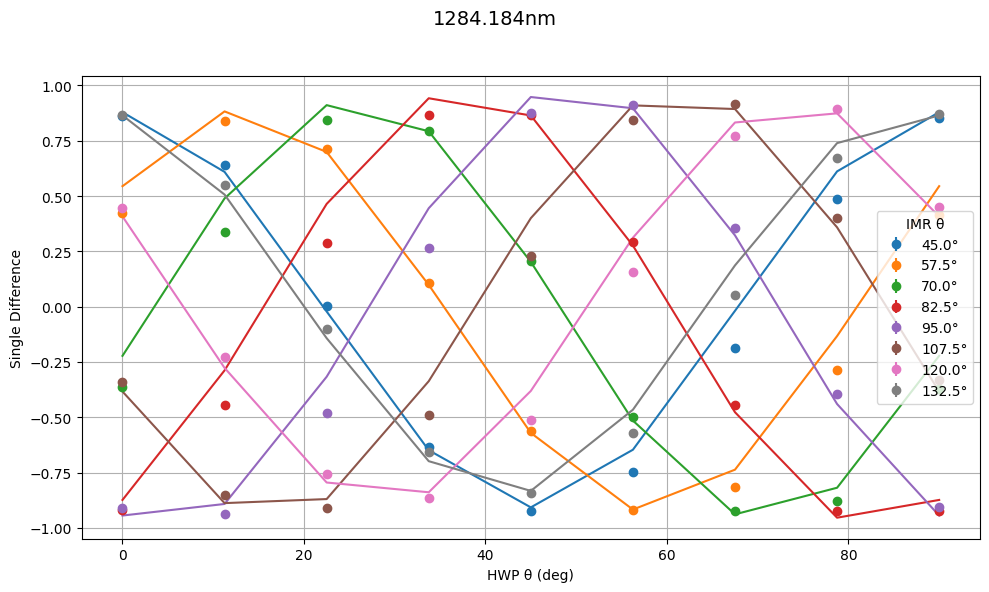

Updated Mueller Matrix:
[[ 0.46603679  0.4660365  -0.00051336  0.        ]
 [-0.46603679 -0.4660365   0.00051336  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.18186855074331276 0.04991374530373072
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 7619023.719560601
       x: [ 3.468e+00 -1.067e-02  3.194e+00 -2.142e-03 -3.156e-02]
     nit: 4
   direc: [[-2.927e-06  1.200e-07 ... -1.502e-08  3.650e-07]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 1.746e-03  2.446e-05 ... -3.061e-06  7.441e-05]]
    nfev: 257
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 7618780.76557851
       x: [ 3.467e+00 -1.067e-02  3.193e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.

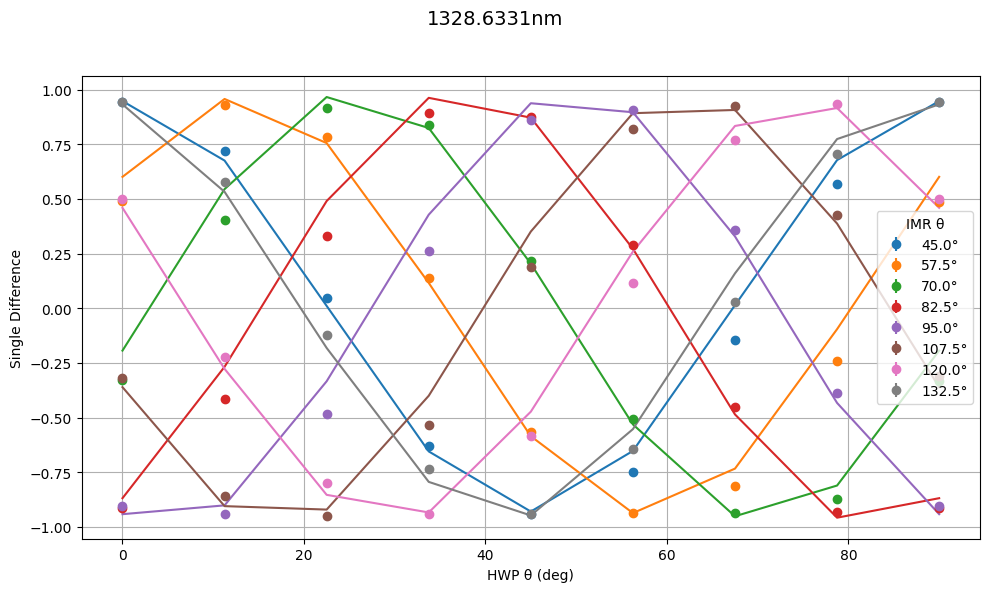

Updated Mueller Matrix:
[[ 0.48313048  0.48313019 -0.00053219  0.        ]
 [-0.48313048 -0.48313019  0.00053219  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1668717396329929 0.060935484140073104
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 33732195.294174135
       x: [ 2.707e+00 -1.067e-02  2.964e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-4.978e-05  1.874e-07 ... -2.345e-08  5.701e-07]]
    nfev: 143
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 33733216.8738619
       x: [ 2.707e+00 -1.067e-02  2.964e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0

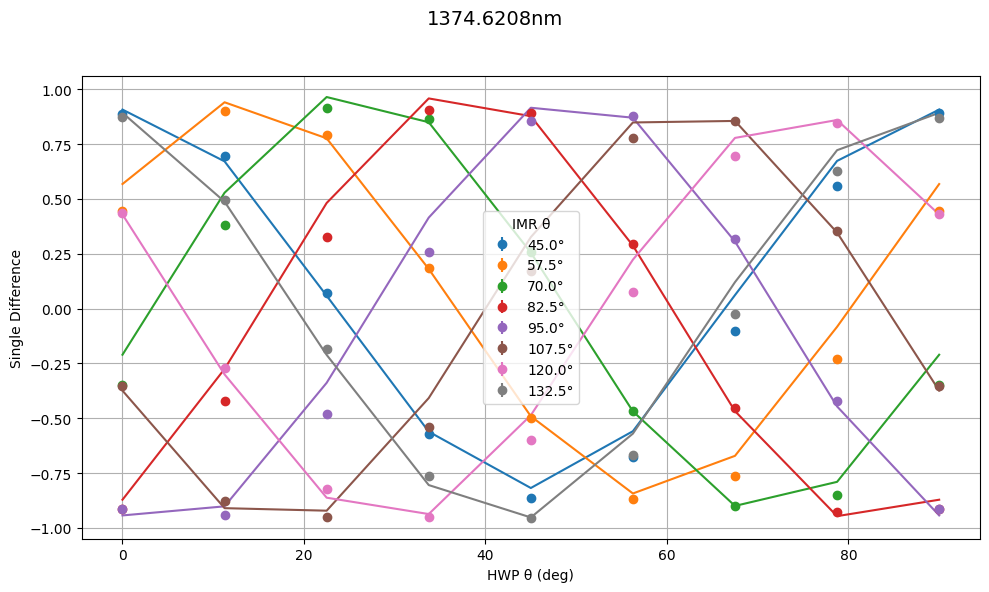

Updated Mueller Matrix:
[[ 0.47305561  0.47305532 -0.00052109  0.        ]
 [-0.47305561 -0.47305532  0.00052109  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16146053722270176 0.0408780870004567
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 16062143.496123385
       x: [ 2.440e+00 -1.067e-02  2.941e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 7.810e-04 -4.018e-06 ...  5.027e-07 -1.222e-05]]
    nfev: 94
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 16062122.537778577
       x: [ 2.440e+00 -1.067e-02  2.941e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0

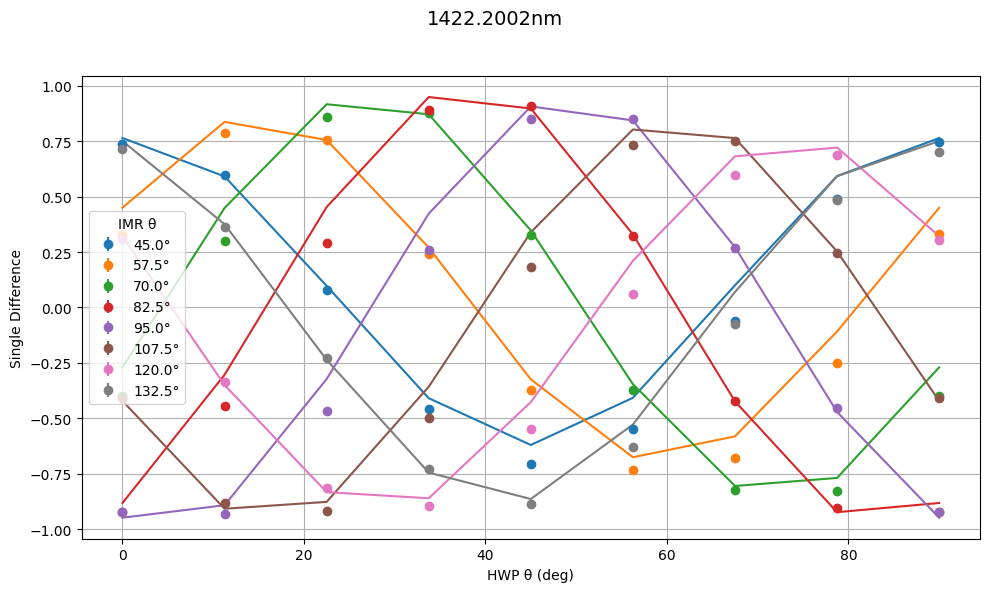

Updated Mueller Matrix:
[[ 0.43752932  0.43752906 -0.00048196  0.        ]
 [-0.43752932 -0.43752906  0.00048196  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.16442378482146341 0.025506122698415568
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 10010992.538408902
       x: [ 2.169e+00 -1.067e-02  2.939e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 3.136e-04 -2.209e-06 ...  2.764e-07 -6.719e-06]]
    nfev: 96
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 10010979.695125379
       x: [ 2.169e+00 -1.067e-02  2.939e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [

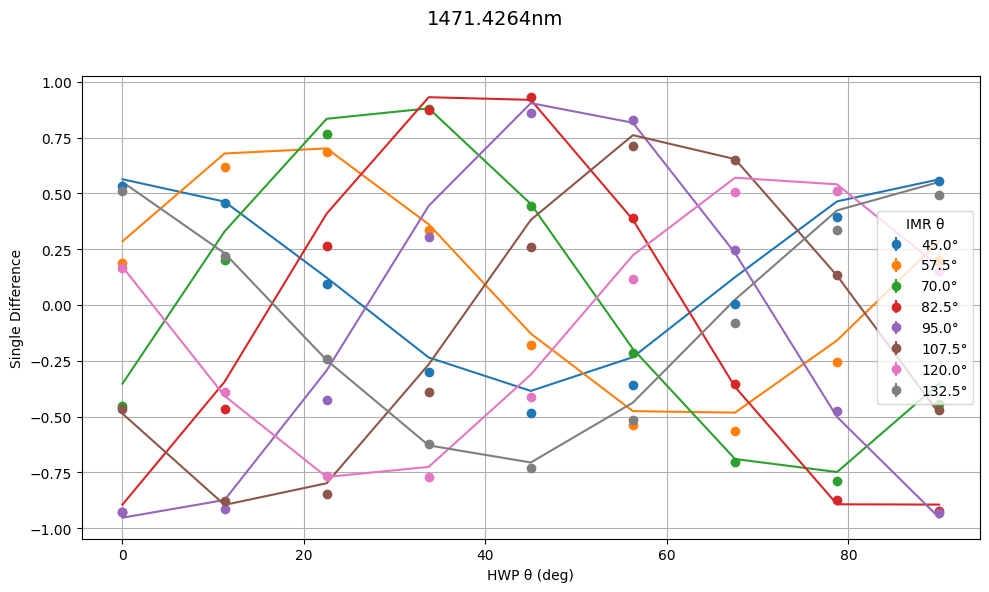

Updated Mueller Matrix:
[[ 0.38786296  0.38786273 -0.00042725  0.        ]
 [-0.38786296 -0.38786273  0.00042725  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1437998334138832 0.02826084724715866
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 8127043.546534809
       x: [ 1.925e+00 -1.067e-02  2.937e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 5.016e-05 -5.035e-07 ...  6.300e-08 -1.531e-06]]
    nfev: 96
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 8127032.549947094
       x: [ 1.925e+00 -1.067e-02  2.937e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.0

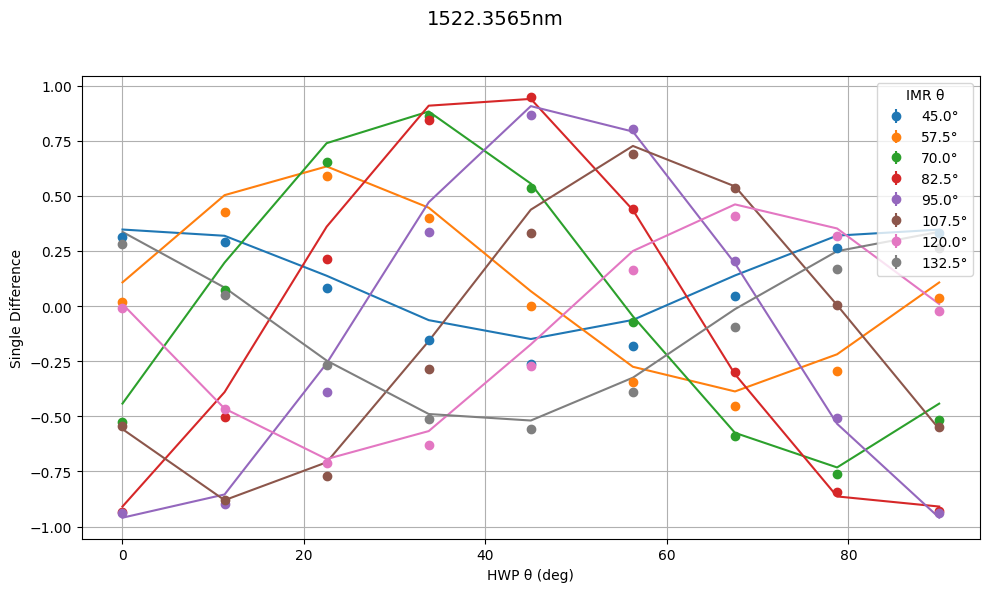

Updated Mueller Matrix:
[[ 0.33418047  0.33418027 -0.00036811  0.        ]
 [-0.33418047 -0.33418027  0.00036811  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14435756328662835 0.027413414062108066
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 9116328.791009754
       x: [ 1.716e+00 -1.067e-02  2.940e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-2.290e-04  4.884e-06 ... -6.111e-07  1.486e-05]]
    nfev: 92
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 9116284.580680083
       x: [ 1.716e+00 -1.067e-02  2.940e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0

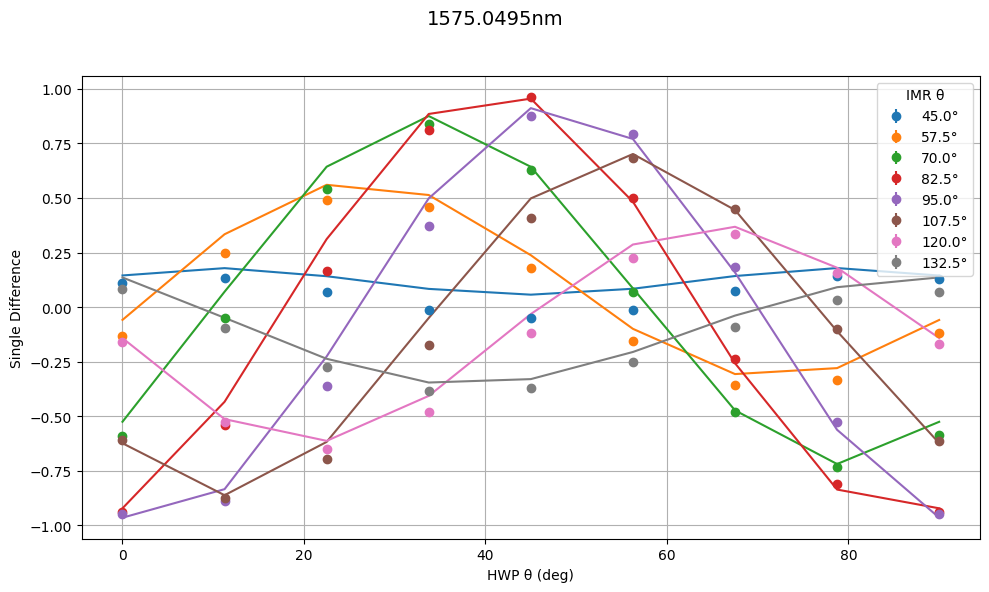

Updated Mueller Matrix:
[[ 0.28397709  0.28397692 -0.00031281  0.        ]
 [-0.28397709 -0.28397692  0.00031281  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14655733807361904 0.034416820341671706
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 10154796.65577973
       x: [ 1.521e+00 -1.065e-02  2.948e+00 -2.144e-03 -3.150e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-2.486e-04  1.866e-05 ... -2.334e-06  5.674e-05]]
    nfev: 123
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 10154946.425329369
       x: [ 1.521e+00 -1.067e-02  2.948e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [

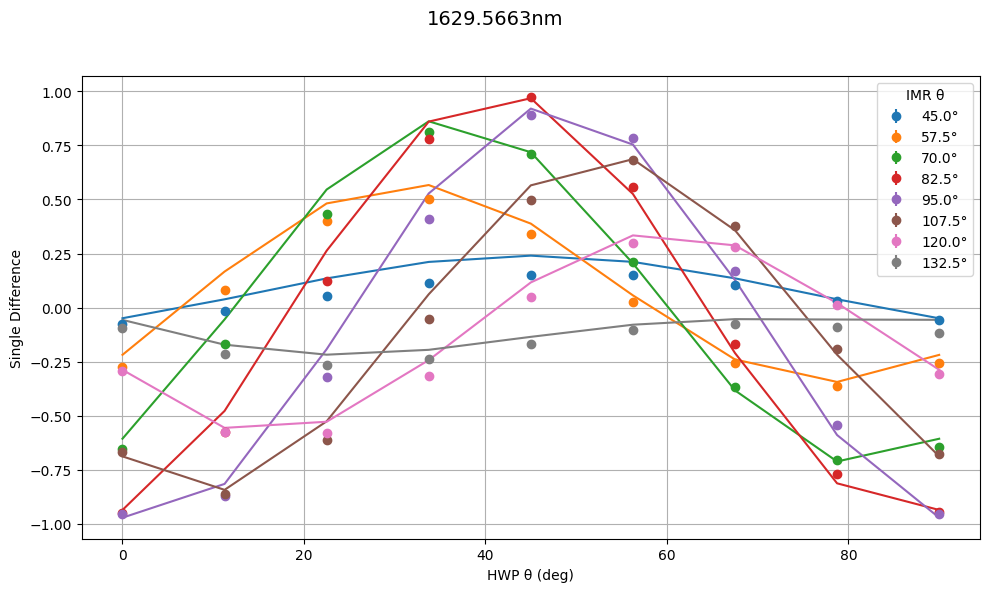

Updated Mueller Matrix:
[[ 0.23585617  0.23585603 -0.00025981  0.        ]
 [-0.23585617 -0.23585603  0.00025981  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1407623204828375 0.04822262856869408
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 10720987.48519092
       x: [ 1.361e+00 -1.065e-02  2.959e+00 -2.144e-03 -3.150e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 3.757e-04  1.866e-05 ... -2.334e-06  5.674e-05]]
    nfev: 107
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 10721046.504265897
       x: [ 1.361e+00 -1.067e-02  2.958e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0

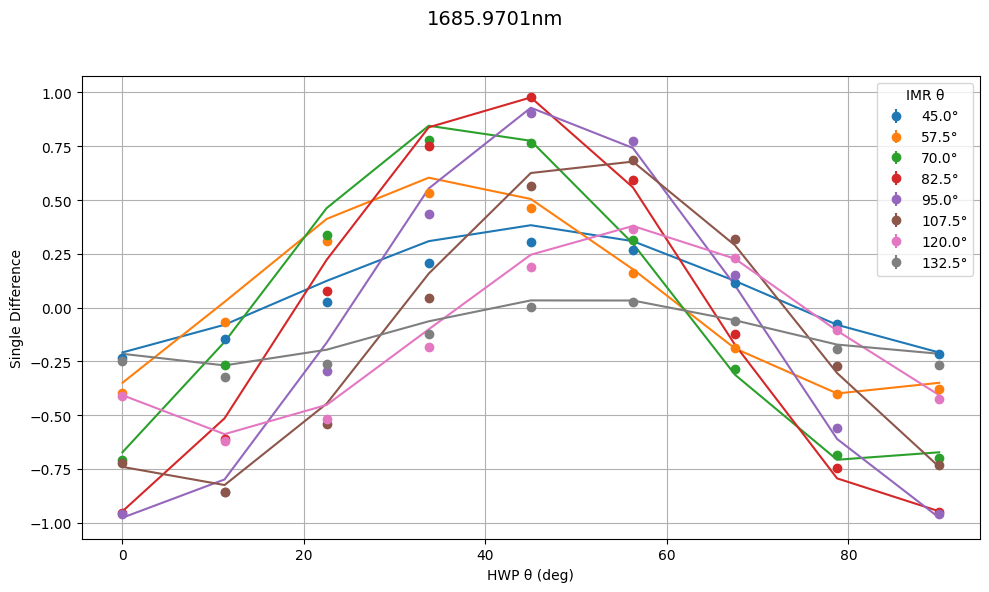

Updated Mueller Matrix:
[[ 0.19640389  0.19640377 -0.00021635  0.        ]
 [-0.19640389 -0.19640377  0.00021635  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.14268860644553177 0.05134283373521009
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 13462690.718062606
       x: [ 1.246e+00 -1.067e-02  2.970e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 5.208e-04  8.743e-06 ... -1.094e-06  2.659e-05]]
    nfev: 93
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 13462650.362684175
       x: [ 1.246e+00 -1.067e-02  2.970e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 

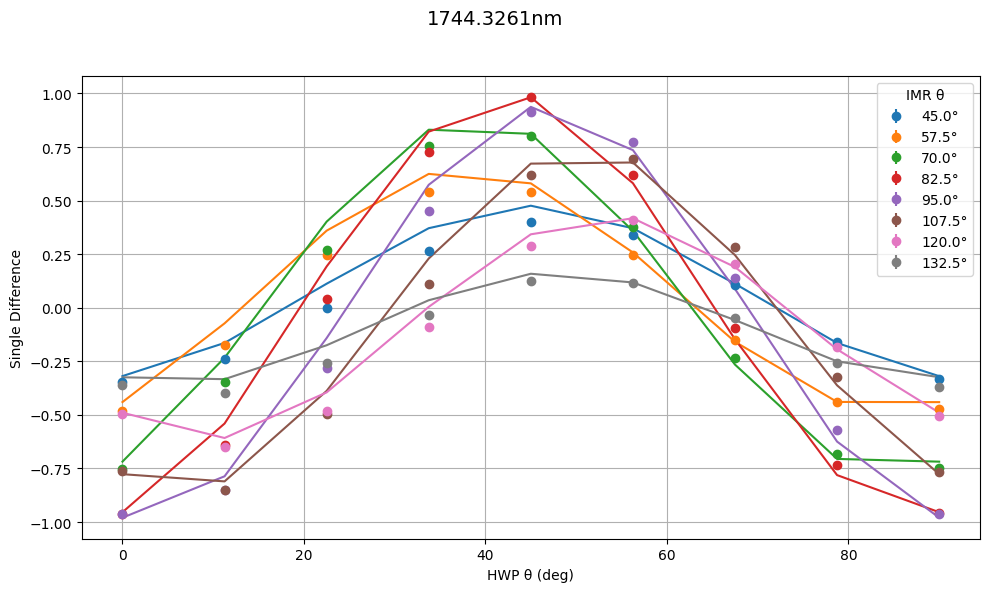

Updated Mueller Matrix:
[[ 0.16894105  0.16894094 -0.0001861   0.        ]
 [-0.16894105 -0.16894094  0.0001861   0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1510241442816279 0.05418543222644456
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 41472419.22403704
       x: [ 1.148e+00 -1.067e-02  2.980e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 4.284e-04  4.780e-06 ... -5.981e-07  1.454e-05]]
    nfev: 97
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 41472369.19335395
       x: [ 1.148e+00 -1.067e-02  2.980e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 0.0

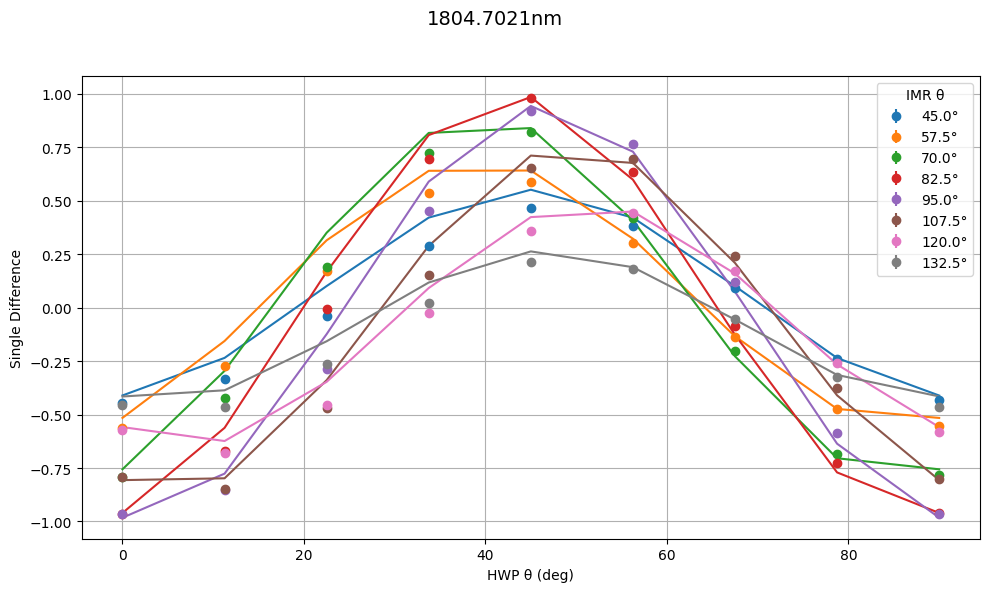

Updated Mueller Matrix:
[[ 0.14622374  0.14622365 -0.00016107  0.        ]
 [-0.14622374 -0.14622365  0.00016107  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1731998644476837 0.04944337465201987
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 188864587.93783045
       x: [ 1.035e+00 -1.067e-02  3.007e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 4.740e-05  5.704e-07 ... -7.137e-08  1.735e-06]]
    nfev: 139
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 188897374.24370718
       x: [ 1.035e+00 -1.067e-02  3.007e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 

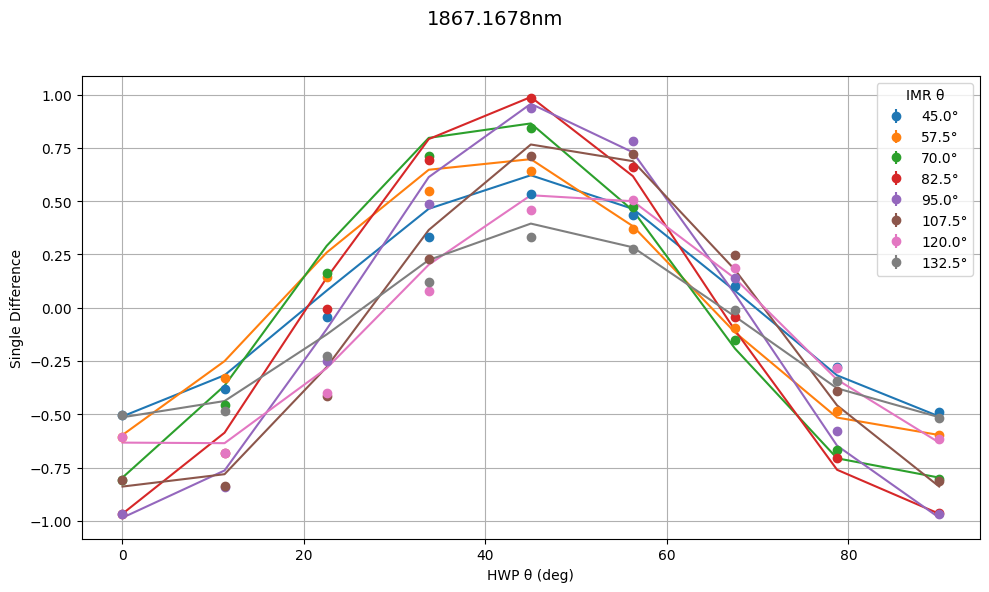

Updated Mueller Matrix:
[[ 0.12150139  0.12150132 -0.00013384  0.        ]
 [-0.12150139 -0.12150132  0.00013384  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.1506971741385063 0.07387766370676543
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 103784813.78787902
       x: [ 9.474e-01 -1.067e-02  3.034e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 4.055e-05  5.332e-07 ... -6.671e-08  1.622e-06]]
    nfev: 139
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 103813980.77174401
       x: [ 9.473e-01 -1.067e-02  3.034e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [ 

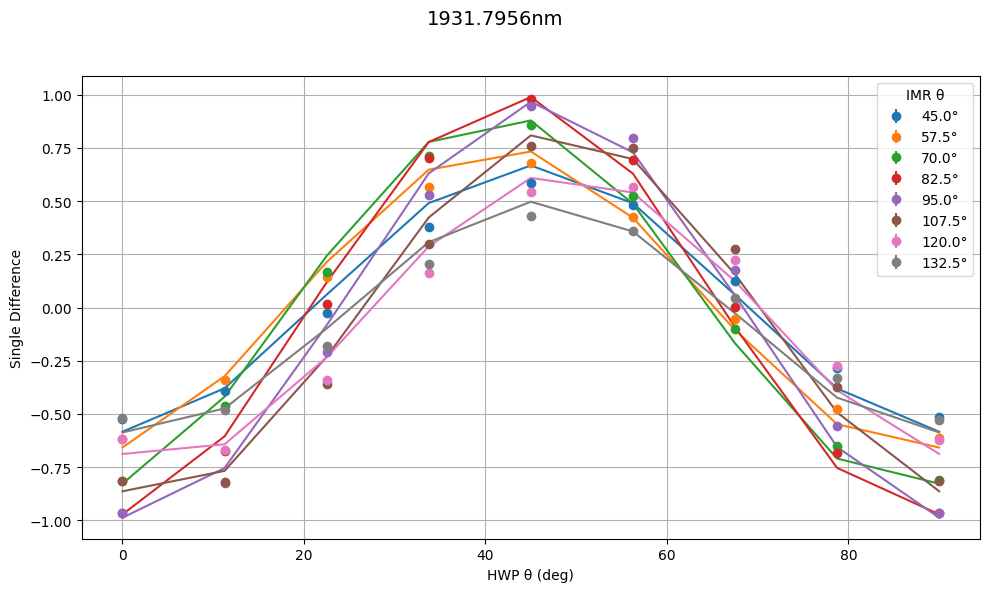

Updated Mueller Matrix:
[[ 0.10325542  0.10325536 -0.00011374  0.        ]
 [-0.10325542 -0.10325536  0.00011374  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Residuals range: -0.12679209655458495 0.11954479583131067
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 103004184.96137501
       x: [ 8.833e-01 -1.067e-02  3.056e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 3.555e-05  5.014e-07 ... -6.274e-08  1.525e-06]]
    nfev: 139
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 103029996.24613214
       x: [ 8.833e-01 -1.067e-02  3.056e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           [

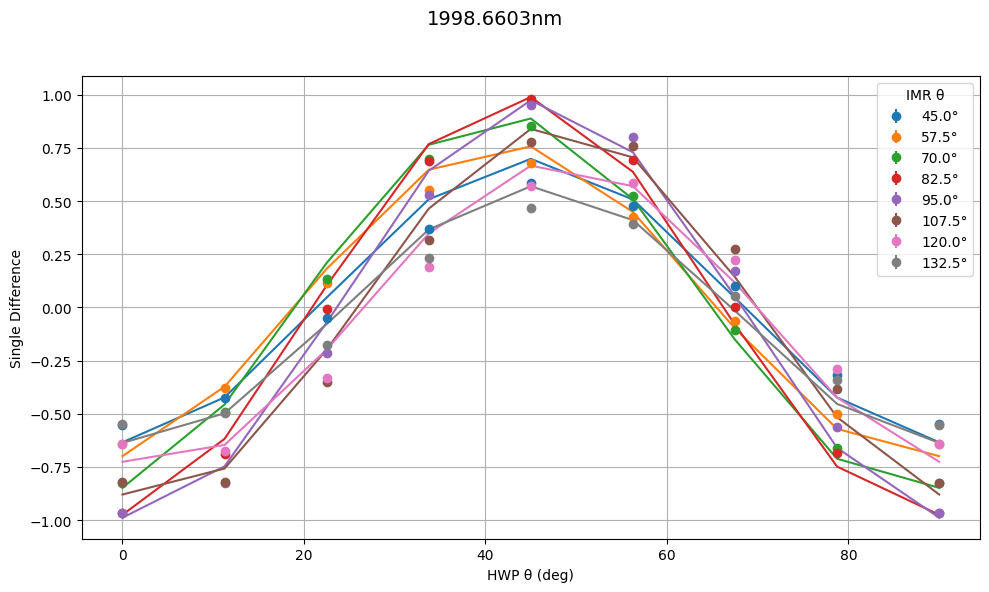

Updated Mueller Matrix:
[[ 9.06573843e-02  9.06573293e-02 -9.98630879e-05  0.00000000e+00]
 [-9.06573843e-02 -9.06573293e-02  9.98630879e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.1580518839785676 0.13635899193418316
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 111117635.37684703
       x: [ 8.399e-01 -1.067e-02  3.090e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 3.217e-05  4.771e-07 ... -5.970e-08  1.451e-06]]
    nfev: 137
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 111142409.07021265
       x: [ 8.399e-01 -1.067e-02  3.090e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: 

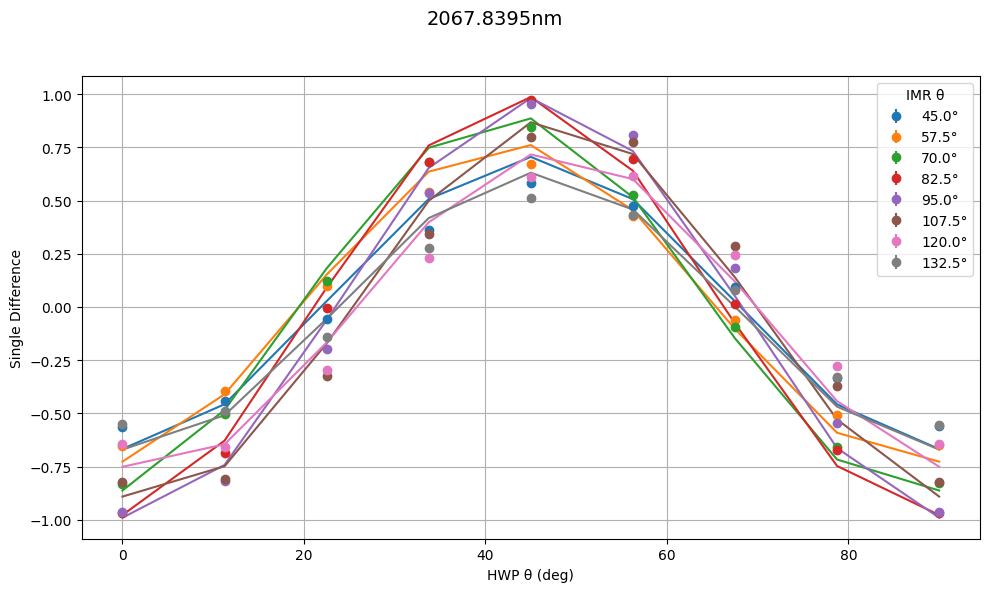

Updated Mueller Matrix:
[[ 8.24819932e-02  8.24819431e-02 -9.08575357e-05  0.00000000e+00]
 [-8.24819932e-02 -8.24819431e-02  9.08575357e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.16573841986488835 0.16474668296703981
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 98129167.00128281
       x: [ 8.140e-01 -1.067e-02  3.131e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 3.015e-05  4.614e-07 ... -5.773e-08  1.403e-06]]
    nfev: 137
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 98149286.09550342
       x: [ 8.140e-01 -1.067e-02  3.131e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [

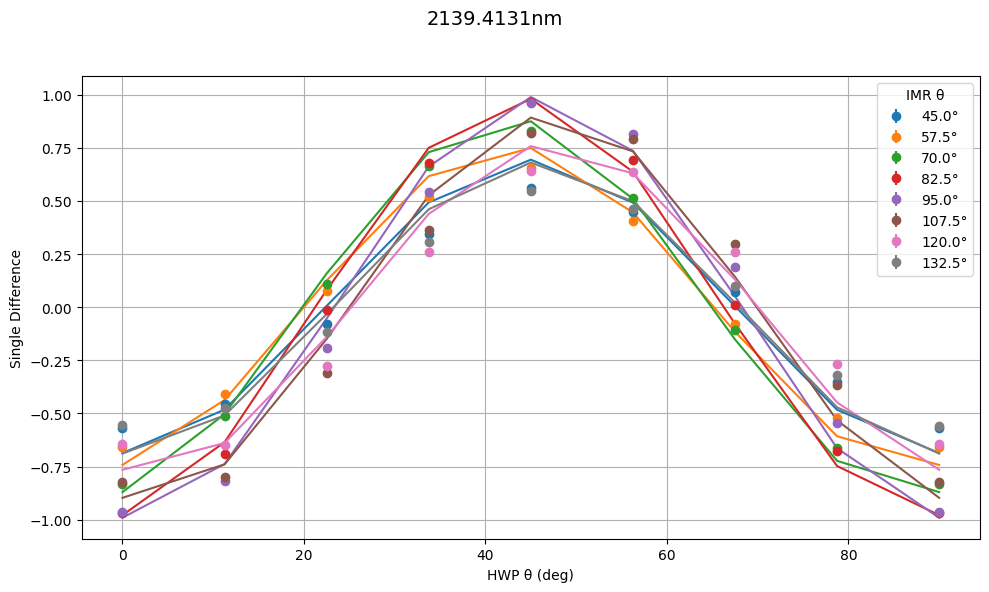

Updated Mueller Matrix:
[[ 7.77478140e-02  7.77477668e-02 -8.56426295e-05  0.00000000e+00]
 [-7.77478140e-02 -7.77477668e-02  8.56426295e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.1787410765399926 0.17927851223250568
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 99316338.9403266
       x: [ 8.003e-01 -1.067e-02  3.171e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 6.241e-05  9.720e-07 ... -1.216e-07  2.956e-06]]
    nfev: 137
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 99353505.63966104
       x: [ 8.002e-01 -1.067e-02  3.171e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [[ 

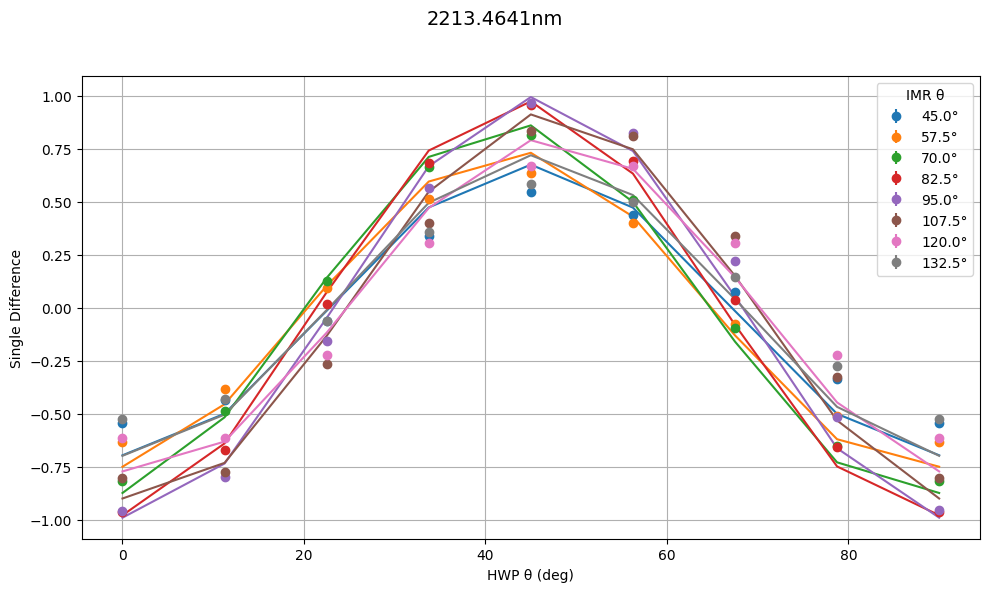

Updated Mueller Matrix:
[[ 7.52725640e-02  7.52725183e-02 -8.29160330e-05  0.00000000e+00]
 [-7.52725640e-02 -7.52725183e-02  8.29160330e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.16411695390840908 0.22370652693706794
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 73540953.75449792
       x: [ 8.026e-01 -1.067e-02  3.232e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 6.259e-05  9.720e-07 ... -1.216e-07  2.956e-06]]
    nfev: 137
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 73569092.77228656
       x: [ 8.025e-01 -1.067e-02  3.232e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [

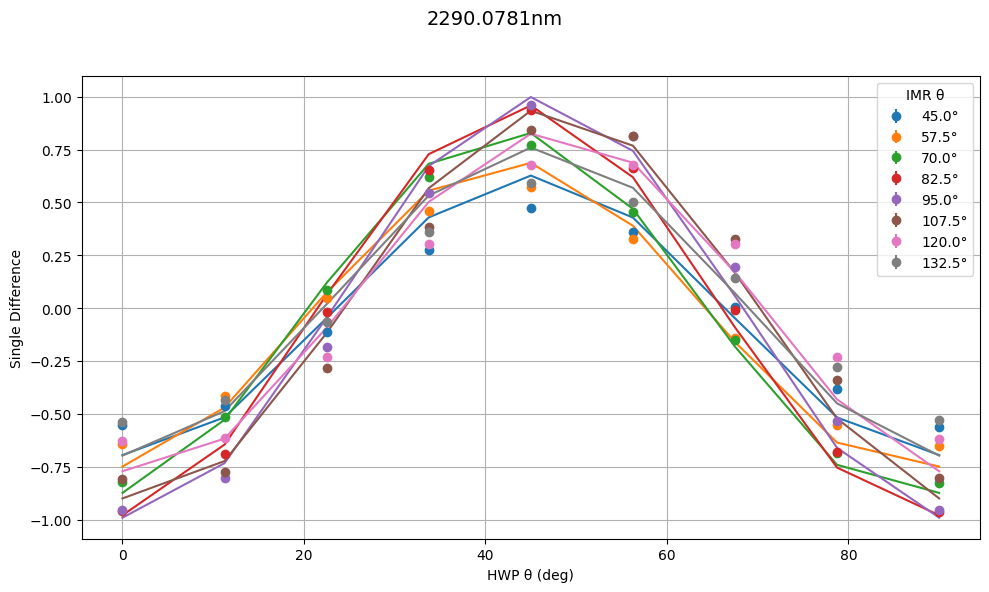

Updated Mueller Matrix:
[[ 7.56704527e-02  7.56704068e-02 -8.33543249e-05  0.00000000e+00]
 [-7.56704527e-02 -7.56704068e-02  8.33543249e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.20092579517878278 0.20178675219631279
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 96805913.73893508
       x: [ 8.154e-01 -1.067e-02  3.247e+00 -2.142e-03 -3.156e-02]
     nit: 2
   direc: [[ 0.000e+00  0.000e+00 ...  0.000e+00  1.000e+00]
           [ 0.000e+00  1.000e+00 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [ 3.025e-05  4.622e-07 ... -5.783e-08  1.406e-06]]
    nfev: 139
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 96817977.71548074
       x: [ 8.153e-01 -1.067e-02  3.247e+00 -2.142e-03 -3.156e-02]
     nit: 1
   direc: [

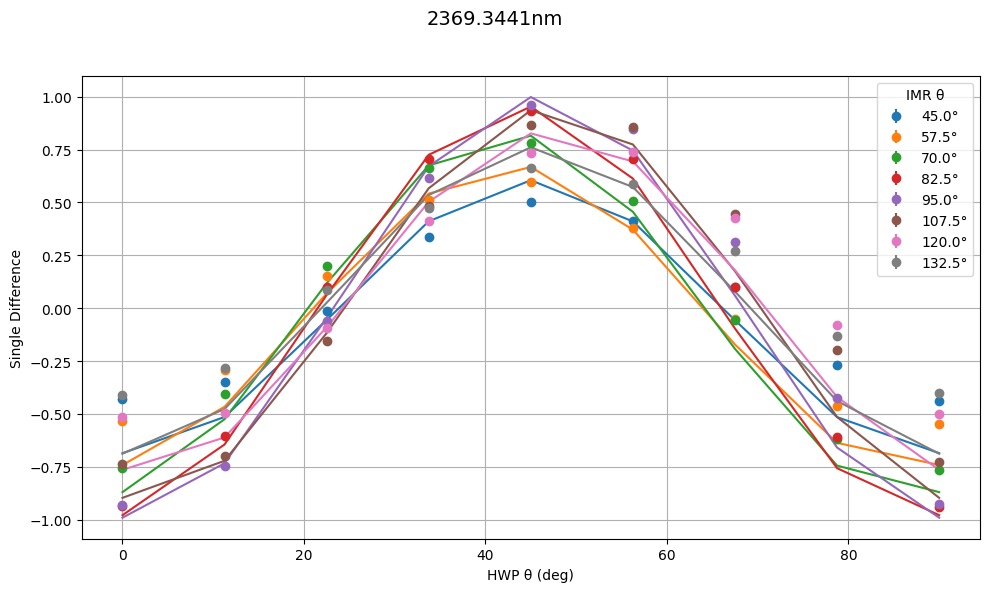

Updated Mueller Matrix:
[[ 7.79670850e-02  7.79670377e-02 -8.58841661e-05  0.00000000e+00]
 [-7.79670850e-02 -7.79670377e-02  8.58841661e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Residuals range: -0.10153037008051491 0.34283540878768415


In [6]:
# Fit all 22 wavelength bins

for bin in range(0,22):
    fit_CHARIS_Mueller_matrix_by_bin(
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Data_visualization_3/csvs_nopickoff/charis_cube_info_bin{bin}_no_pickoff.csv'),
        bin,
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/system_dicts_no_pickoff/sysdictbin{bin}nopick.json'),
        plot_path=Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/model_plots_no_pickoff/bin{bin}nopick.png')
    )
